<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="world-happiness-report-2019.csv"
df=pd.read_csv(url)


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [7]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [4]:
freadom = df['Freedom']

<AxesSubplot:>

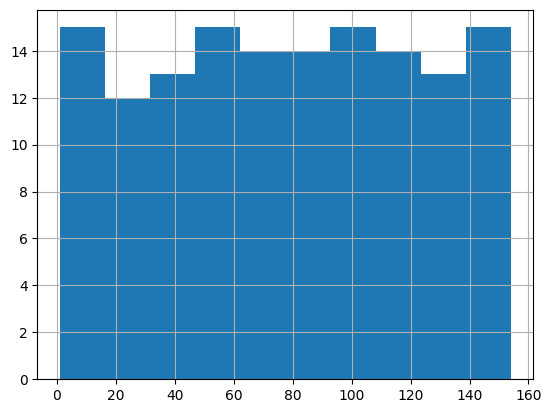

In [32]:
df['Positive affect'].hist()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [30]:
mediana = freadom.median()
# mode = freadom.mode()
mean = freadom.mean()
std = freadom.std()
var = freadom.var()
min = freadom.min()
max = freadom.max()
scope = max  - min
mediana, mean, std, var, min, max, scope

(79.5,
 78.82857142857142,
 45.108971631877274,
 2034.8193216855088,
 1.0,
 155.0,
 154.0)

Почему нельзя найти моду?

In [23]:
statistics.median(freadom)

79.5

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

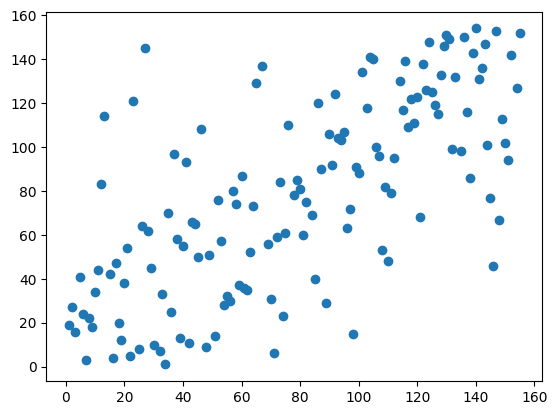

In [38]:
plt.scatter(x=df['Freedom'], y=df['Positive affect'])

In [39]:
sts.spearmanr(df['Freedom'], df['Positive affect'])

SpearmanrResult(correlation=0.6977192713913977, pvalue=9.84892186923605e-22)

In [5]:
freadom_n = freadom - freadom.mean()
freadom_n.mean()

6.496390726949487e-15

In [7]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler((0, 1))
freadom_n = scaler.fit_transform(freadom_n.to_numpy().reshape(-1, 1))


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [12]:
freadom_n = pd.Series(freadom_n.reshape(-1))
# freadom_n.reshape(-1)

In [15]:
freadom_n.describe()

count    140.000000
mean       0.505380
std        0.292915
min        0.000000
25%        0.251623
50%        0.509740
75%        0.761364
max        1.000000
dtype: float64

Нормализовать данные колонки Freedom (централизация + масштабирование)

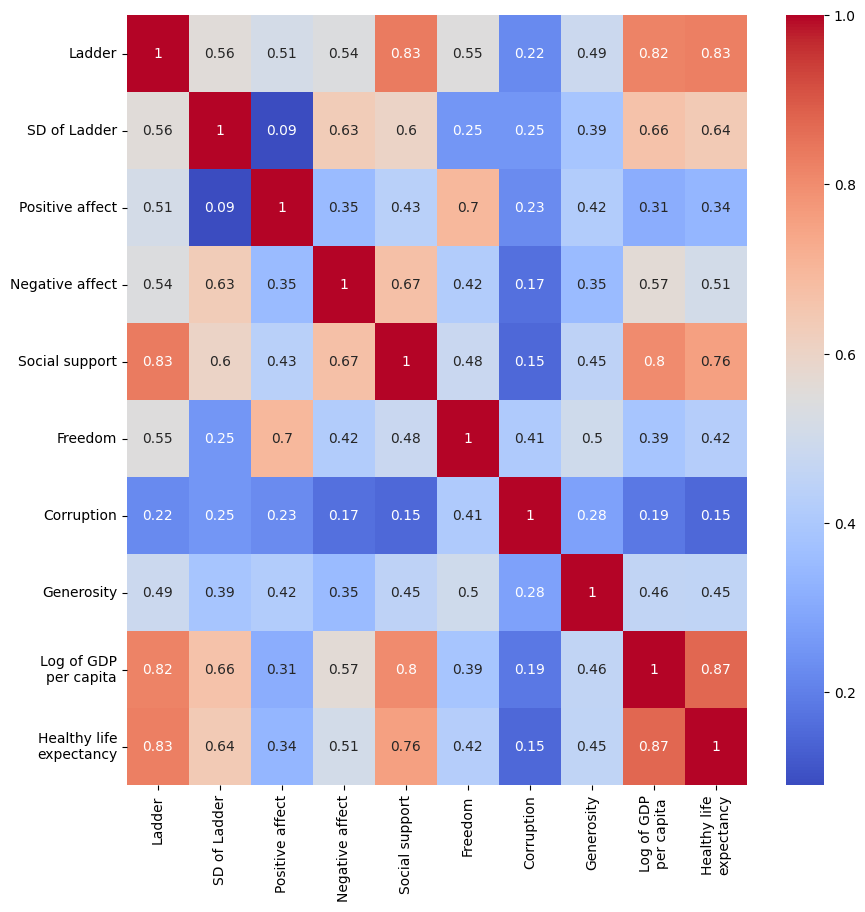

In [17]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
f = plt.gcf()
f.set_size_inches(10, 10)
pass

Построить матрицу корреляций для всех колонок таблицы

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

Загрузить таблицу цен на авокадо: 

In [78]:
# import io
# import requests
url="avocado.csv"
df=pd.read_csv(url)
df[:3]
dff = df

Сделать частотный график колонки AveragePrice. Какое это распределение?

In [20]:
avgp = df.AveragePrice

<AxesSubplot:>

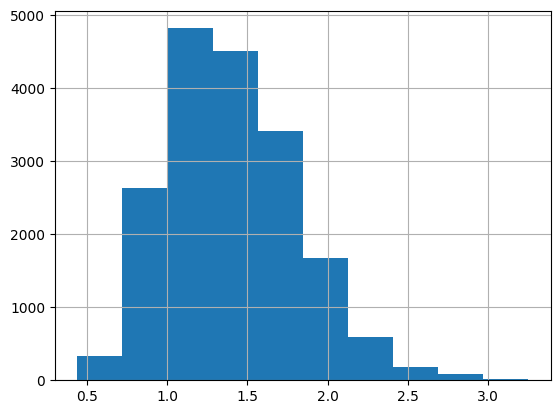

In [23]:
avgp.hist()

((array([-3.95678874, -3.73949546, -3.62054525, ...,  3.62054525,
          3.73949546,  3.95678874]),
  array([0.44, 0.46, 0.48, ..., 3.12, 3.17, 3.25])),
 (0.39842500611235293, 1.4059784097758783, 0.9892635030043415))

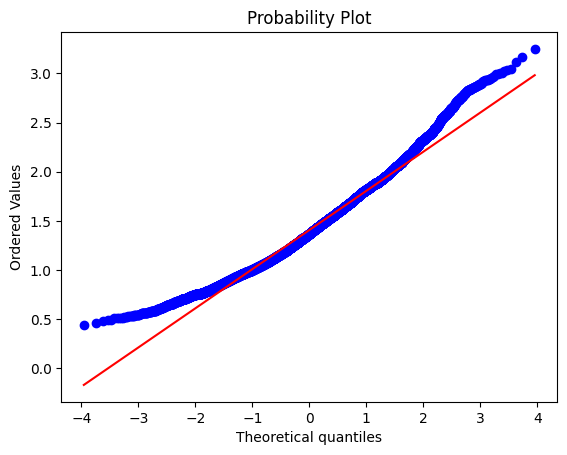

In [22]:
sts.probplot(avgp, plot=plt)

In [24]:
sts.normaltest(avgp)

NormaltestResult(statistic=948.092384337871, pvalue=1.3315410928093364e-206)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [26]:
df[['4046', '4225', '4770', 'AveragePrice']].corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [79]:

df = df[(df['type'] =='organic') & (df['region'] == 'LasVegas')]
df_copy = df

In [ ]:
df

In [74]:
df = df_copy

In [80]:
df = df[['Date', 'AveragePrice']]
df['Date'] = pd.to_datetime(df['Date'])

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Date'>

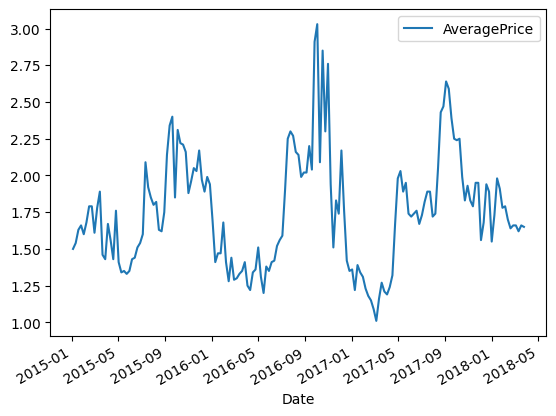

In [81]:
df.plot.line(x='Date', y='AveragePrice')

In [82]:
df.rename(columns={'Date' : 'ds', 'AveragePrice' : 'y'}, inplace=True)

c:\python\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.info()

In [45]:
scaler = sklearn.preprocessing.MinMaxScaler((0,1))
ds = df['ds']
y = df['y']


In [46]:
y = scaler.fit_transform(y.to_numpy().reshape(-1, 1))
y

array([[0.31672598],
       [0.32384342],
       [0.17437722],
       ...,
       [0.5088968 ],
       [0.53024911],
       [0.41992883]])

In [94]:
df.sort_values('ds', inplace=True)

c:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [95]:
amount_80 = int(len(df) * 0.8)
df_train = df[:amount_80]
df_test = df[amount_80:]


In [96]:
df_train.tail()

,ds,y
15880,2017-07-02,1.73
15879,2017-07-09,1.82
15878,2017-07-16,1.89
15877,2017-07-23,1.89
15876,2017-07-30,1.72


In [97]:
df_test.tail()

,ds,y
17857,2018-02-25,1.66
17856,2018-03-04,1.66
17855,2018-03-11,1.62
17854,2018-03-18,1.66
17853,2018-03-25,1.65


In [101]:
import prophet

In [102]:
pr = prophet.Prophet()
pr.fit(df_train)

14:43:03 - cmdstanpy - INFO - Chain [1] start processing
14:43:03 - cmdstanpy - INFO - Chain [1] done processing


<AxesSubplot:xlabel='ds'>

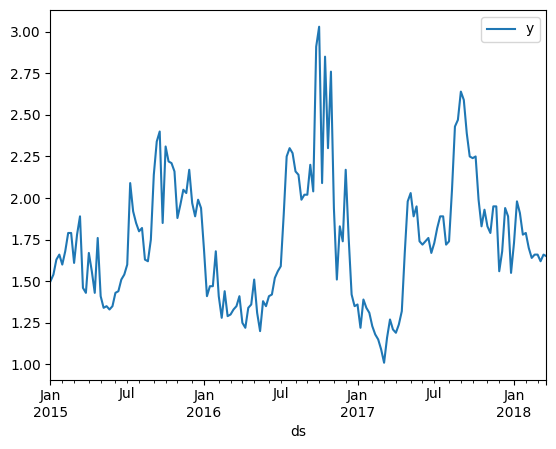

In [98]:
df.plot.line(x='ds', y='y')

<AxesSubplot:xlabel='ds'>

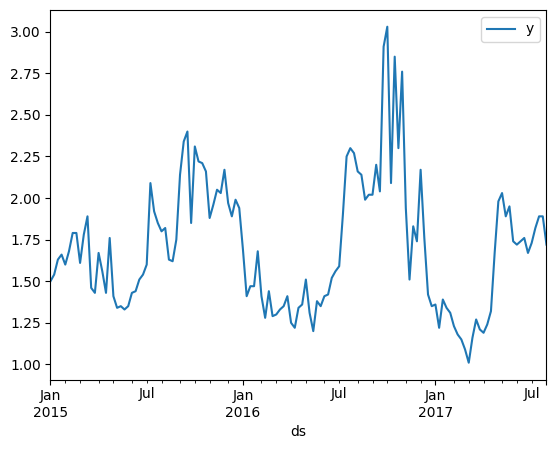

In [99]:
df_train.plot.line(x='ds', y='y')

<AxesSubplot:xlabel='ds'>

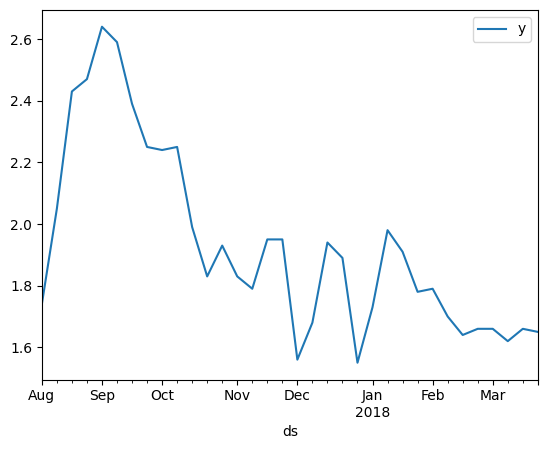

In [100]:
df_test.plot.line(x='ds', y='y')

In [104]:
df_train.iloc[-1]

ds    2017-07-30 00:00:00
y                    1.72
Name: 15876, dtype: object

In [112]:
days = (df_test.iloc[-1] - df_train.iloc[-1])['ds'].days

In [113]:
future = pr.make_future_dataframe(days)

In [114]:
forecast = pr.predict(future)

In [ ]:
forecast

<AxesSubplot:xlabel='ds'>

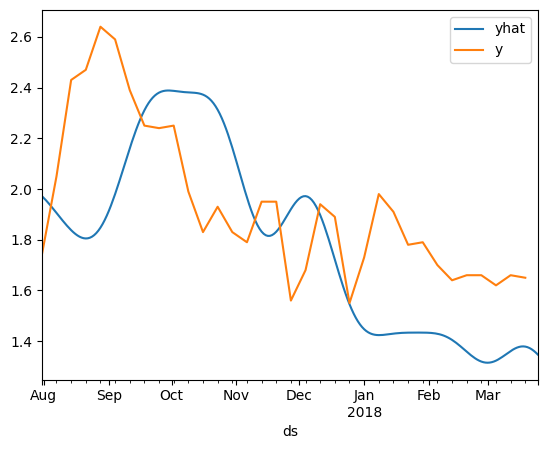

In [123]:
_, ax = plt.subplots()
forecast[forecast['ds'] > '2017-07-30'].plot.line(x='ds', y='yhat', ax = ax)
df_test.plot.line(x='ds', y='y', ax = ax)
